# Online shopping Customer Segmentation

Problem statement

Customer Segmentation and Recommendation

1.Segment (Group/Cluster) customer on basis of RFM (Recency, Frequency, Monetary).

2.Identify trends for Day, Month, Season, Time by Invoice count.

3.Create a recommendation of different product as per specific client.

4 Movie Recommendation as per Movie Tags / Review.(MOVIE DATASET).


Recency, frequency, monetary value (RFM) is a model used in marketing analysis that segments a company’s consumer base by their purchasing patterns or habits. In particular, it evaluates customers’ recency (how long ago they made a purchase), frequency (how often they make purchases), and monetary value (how much money they spend).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
original_data=pd.read_excel("Online_shopping.xlsx")

# Problem statement 1. Segment (Group/Cluster) customer on basis of RFM (Recency, Frequency, Monetary) 

In [3]:
df=original_data.copy()
df.head(100)

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
95,536378,22352,lunch box with cutlery retrospot,LUNCH BOX WITH CUTLERY RETROSPOT,6,2010-12-01 09:37:00,2.55,14688.0,United Kingdom
96,536378,21212,pack of 72 retrospot cake cases,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom
97,536378,21975,pack of 60 dinosaur cake cases,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom
98,536378,21977,pack of 60 pink paisley cake cases,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom


In [4]:
# Recency ---- Latest date-Last date of invoice of a customer
# Frequency ---- Total no. of Invoice generated a particular client
# Monetary ----- Sum of all invoice of a particular client

In [5]:
df["Country"].value_counts(normalize=True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [7]:
# Segmentaion - customer clustering on basis of Recency , Frequency,Monetary
# we dont need the following items.

In [8]:
df1=df.drop(["StockCode","Description","lower","Country"],axis=1)
df1.head(2)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [9]:
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

# Experiment

In [11]:
df10=df1.copy()

In [12]:
first_df=df10[df10["CustomerID"].notnull()]
second_df=df10[df10["CustomerID"].isnull()]

In [13]:
second_df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,56,2010-12-01 11:52:00,0.00,NaN
1443,536544,1,2010-12-01 14:32:00,2.51,NaN
1444,536544,2,2010-12-01 14:32:00,2.51,NaN
1445,536544,4,2010-12-01 14:32:00,0.85,NaN
1446,536544,2,2010-12-01 14:32:00,1.66,NaN
...,...,...,...,...,...
541536,581498,5,2011-12-09 10:26:00,4.13,NaN
541537,581498,4,2011-12-09 10:26:00,4.13,NaN
541538,581498,1,2011-12-09 10:26:00,4.96,NaN
541539,581498,1,2011-12-09 10:26:00,10.79,NaN


In [14]:
first_df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0
541906,581587,4,2011-12-09 12:50:00,4.15,12680.0
541907,581587,4,2011-12-09 12:50:00,4.15,12680.0


In [15]:
testing=first_df["InvoiceNo"].isin(second_df["InvoiceNo"])

In [16]:
testing

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: InvoiceNo, Length: 406829, dtype: bool

In [17]:
testing.value_counts()

False    406829
Name: InvoiceNo, dtype: int64


# continue the project

In [18]:
df1.dropna(axis=0,inplace=True)

In [19]:
df1.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [20]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [21]:
# Quantity is negative because some customer has returned the item.
# unit price can be zero because its a free item

In [22]:
df1[df1["UnitPrice"]==0]["UnitPrice"].count()

40

In [23]:
df1[df1["UnitPrice"]==0].head(10)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0
56674,541109,1,2011-01-13 15:10:00,0.0,15107.0
86789,543599,16,2011-02-10 13:08:00,0.0,17560.0
130188,547417,36,2011-03-23 10:25:00,0.0,13239.0
139453,548318,5,2011-03-30 12:45:00,0.0,13113.0
145208,548871,2,2011-04-04 14:42:00,0.0,14410.0


In [ ]:
# we are considering return as - No business but we are not dropping those transations and customers

In [24]:
df1=df1[df1["Quantity"]>0]

In [25]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [26]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [27]:
# create a column total =Qty* unit price

In [28]:
df1["Total"]=df1["Quantity"]*df1["UnitPrice"]
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [29]:
df2=df1.drop(["Quantity","UnitPrice"],axis=1)
df2.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [30]:
df_final100=df2.groupby(["InvoiceNo"]).agg({"Total":"sum"}).reset_index()
df_final100.head()

,InvoiceNo,Total
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85


In [31]:
df_final=df2.groupby(["InvoiceNo","InvoiceDate","CustomerID"]).agg({"Total":"sum"}).reset_index()

In [32]:
df_final.head(100)

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...,...
95,536569,2010-12-01 15:35:00,16274.0,357.95
96,536570,2010-12-01 15:35:00,14496.0,304.34
97,536571,2010-12-01 15:37:00,14696.0,294.62
98,536572,2010-12-01 15:40:00,16539.0,442.35


# Goal 1:- PERFORMING Cust Segment on R F M

In [33]:
max(df_final["InvoiceDate"])

Timestamp('2011-12-09 12:50:00')

In [34]:
min(df_final["InvoiceDate"])

Timestamp('2010-12-01 08:26:00')

In [35]:
# the given dataset belongs to Dec 1st 2010 to Dec 9th 2011

In [37]:
# Recency= Latest Date - last Invoice date of customer

In [38]:
# to create a latest date 

In [39]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

In [40]:
# Recency
# frequency - count of invoice no.(how many times the customer id appear)
# Monetary-Sum of total-

In [41]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [42]:
RFM_Score=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                             "InvoiceNo":lambda x:x.count(),
                                             "Total":lambda x:x.sum()}).reset_index()

In [43]:
RFM_Score.head()

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [44]:
# Rename the column Name
RFM_Score=RFM_Score.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})

In [46]:
RFM_Score.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [47]:
RFM1=RFM_Score.copy()

In [48]:
RFM1["R_Rank"]=RFM1["Recency"].rank(ascending=False)

In [49]:
RFM1["R_Rank"]

0        162.5
1       4156.5
2       1646.0
3       3209.5
4        227.5
         ...  
4334     355.0
4335     860.0
4336    3839.5
4337    4064.5
4338    2357.0
Name: R_Rank, Length: 4339, dtype: float64

In [50]:
RFM1["F_Rank"]=RFM1["Frequency"].rank(ascending=True)

In [51]:
RFM1["M_Rank"]=RFM1["Monetary"].rank(ascending=True)

In [52]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_Rank,F_Rank,M_Rank
0,12346.0,325,1,77183.60,162.5,746.5,4330.0
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0
4,12350.0,310,1,334.40,227.5,746.5,1230.0


In [53]:
RFM1["R_final"]=(RFM1["R_Rank"]/RFM1["R_Rank"].max())*100

In [54]:
RFM1["R_final"]

0        3.759833
1       96.170754
2       38.084220
3       74.259602
4        5.263767
          ...    
4334     8.213790
4335    19.898195
4336    88.836187
4337    94.042110
4338    54.534938
Name: R_final, Length: 4339, dtype: float64

In [55]:
RFM1["F_final"]=(RFM1["F_Rank"]/RFM1["F_Rank"].max())*100

In [56]:
RFM1["M_final"]=(RFM1["M_Rank"]/RFM1["M_Rank"].max())*100

In [57]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_Rank,F_Rank,M_Rank,R_final,F_final,M_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833,17.204425,99.792579
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754,85.492049,92.279327
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220,69.785665,76.837981
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602,17.204425,76.192671
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767,17.204425,28.347546


In [58]:
RFM1.drop(columns=["R_Rank","F_Rank","M_Rank"],inplace=True)

In [59]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final
0,12346.0,325,1,77183.60,3.759833,17.204425,99.792579
1,12347.0,2,7,4310.00,96.170754,85.492049,92.279327
2,12348.0,75,4,1797.24,38.084220,69.785665,76.837981
3,12349.0,18,1,1757.55,74.259602,17.204425,76.192671
4,12350.0,310,1,334.40,5.263767,17.204425,28.347546


In [60]:
# we can assign the weightage on R F M

In [61]:
RFM1["RFM_SUM"]=0.15*RFM1["R_final"]+0.30*RFM1["F_final"]+0.60*RFM1["M_final"]

In [62]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM
0,12346.0,325,1,77183.60,3.759833,17.204425,99.792579,65.600850
1,12347.0,2,7,4310.00,96.170754,85.492049,92.279327,95.440824
2,12348.0,75,4,1797.24,38.084220,69.785665,76.837981,72.751121
3,12349.0,18,1,1757.55,74.259602,17.204425,76.192671,62.015870
4,12350.0,310,1,334.40,5.263767,17.204425,28.347546,22.959420


In [63]:
RFM1=RFM1.round(2)
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96


In [64]:
max(RFM1["RFM_SUM"])

104.92

In [65]:
min(RFM1["RFM_SUM"])

5.36

In [66]:
loyality_label=["Silver","Gold","Diamond","Platinum"]

In [67]:
quantile100=RFM1["RFM_SUM"].quantile(q=[0.25,0.50,0.75])

In [68]:
quantile100

0.25    28.365
0.50    51.290
0.75    75.885
Name: RFM_SUM, dtype: float64

In [69]:
# create a function
def loyality(x):
    if x<=28:
        return "Silver"
    elif x<=51:
        return "Gold"
    elif x<=76:
        return "Diamond"
    else:
        return "Platinum"

In [70]:
RFM1["Loyality"]=RFM1["RFM_SUM"].apply(loyality)

In [71]:
RFM1.head(100)

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM,Loyality
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60,Diamond
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44,Platinum
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75,Diamond
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02,Diamond
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96,Silver
...,...,...,...,...,...,...,...,...,...
95,12462.0,18,2,1189.59,74.26,44.03,66.47,64.23,Diamond
96,12463.0,53,4,1344.78,48.37,69.79,69.81,70.08,Diamond
97,12464.0,10,8,1212.05,83.64,88.22,66.88,79.14,Platinum
98,12465.0,17,2,742.19,75.72,44.03,53.24,56.51,Diamond


In [72]:
RFM1["Loyality"].value_counts()

Diamond     1101
Gold        1098
Platinum    1080
Silver      1060
Name: Loyality, dtype: int64

In [73]:
# all the above segregation is mannual approach

# K means ALGORITHM segrigation

In [78]:
New_data=RFM1["RFM_SUM"]
New_data.head()
New_data=pd.DataFrame(New_data)

In [75]:
from sklearn.cluster import KMeans

In [76]:
kmeans1=KMeans(n_clusters=4,max_iter=100,random_state=10)

In [77]:
y_means=kmeans1.fit_predict(New_data)
y_means

array([3, 0, 3, ..., 1, 0, 3])

In [79]:
RFM1["Cluster"]=kmeans1.labels_
RFM1.head(100)

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM,Loyality,Cluster
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60,Diamond,3
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44,Platinum,0
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75,Diamond,3
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02,Diamond,3
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96,Silver,2
...,...,...,...,...,...,...,...,...,...,...
95,12462.0,18,2,1189.59,74.26,44.03,66.47,64.23,Diamond,3
96,12463.0,53,4,1344.78,48.37,69.79,69.81,70.08,Diamond,3
97,12464.0,10,8,1212.05,83.64,88.22,66.88,79.14,Platinum,0
98,12465.0,17,2,742.19,75.72,44.03,53.24,56.51,Diamond,3


In [80]:
RFM1["Cluster"].value_counts()

2    1250
1    1107
3    1039
0     943
Name: Cluster, dtype: int64

In [81]:
# Evaluation of cluster

In [82]:
from sklearn.metrics import silhouette_score

In [83]:
labels=kmeans1.labels_
print(silhouette_score(New_data,labels))

0.5649352983403836


# Goal no. 2 ------ Analysing the sales Trend as per day, timing, season, month,weekend

In [84]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [85]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18566 entries, 0 to 18565
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    18566 non-null  int64         
 1   InvoiceDate  18566 non-null  datetime64[ns]
 2   CustomerID   18566 non-null  float64       
 3   Total        18566 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 580.3 KB


In [86]:
df_final100=df_final.copy()
df_final100.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [87]:
# how to extract info from Datetime datatypes

In [88]:
import datetime as dt

In [89]:
df_final100["Day"]=df_final100["InvoiceDate"].dt.day_name()
df_final100.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday


In [90]:
df_final100["Day"].value_counts()

Thursday     4038
Wednesday    3462
Tuesday      3189
Monday       2865
Friday       2835
Sunday       2177
Name: Day, dtype: int64

In [91]:
df_final100["Month"]=df_final100["InvoiceDate"].dt.month
df_final100["Hour"]=df_final100["InvoiceDate"].dt.hour

In [92]:
#df_final100["Date"]=df_final100["InvoiceDate"].dt.date

In [93]:
df_final100.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8


In [94]:
df_final100["week_info"]=np.where((df_final100.Day=="Saturday")|(df_final100.Day=="Sunday"),"Weekend","WeekDay")

In [95]:
df_final100.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour,week_info
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8,WeekDay
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,WeekDay
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8,WeekDay
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,WeekDay
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,WeekDay


In [96]:
# analysing the business as per day

In [97]:
day_count=df_final100.groupby("Day")["InvoiceNo"].count().to_frame("count_of_invoices").reset_index()

In [98]:
day_count

,Day,count_of_invoices
0,Friday,2835
1,Monday,2865
2,Sunday,2177
3,Thursday,4038
4,Tuesday,3189
5,Wednesday,3462


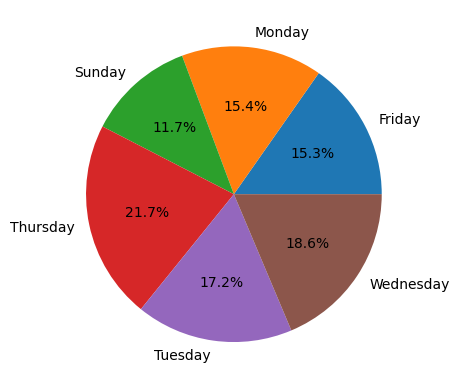

In [99]:
plt.pie(day_count['count_of_invoices'],autopct='%0.01f%%',labels=day_count['Day'])
plt.show()

(1)plot the no. of invoice by season...winter, Monsoon,Summer,spring (2)plot the no. of invoice by morning, afternoon, evening (3)plot the no. of invoice by Month

In [100]:
# function to create season and timing

def cal_season(x):
    if x in [10,11,12,1]:
        return "Winter"
    if x in [2,3]:
        return "spring"
    if x in [4,5,6]:
        return "Summer"
    else:
        return "Monsoon"

In [101]:
def cal_timing(x):
    if x in range(4,7):
        return "early morning"
    elif x in range(7,11):
        return "Morning"
    elif x in range(11,16):
        return "afternoon"
    else:
        return "evening"

In [102]:
df_final100["season"]=df_final100["Month"].apply(cal_season)
df_final100["Time"]=df_final100["Hour"].apply(cal_timing)

In [103]:
df_final100.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour,week_info,season,Time
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8,WeekDay,Winter,Morning
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,WeekDay,Winter,Morning
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8,WeekDay,Winter,Morning
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,WeekDay,Winter,Morning
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,WeekDay,Winter,Morning


In [104]:
df_final100["Time"].value_counts()

afternoon        12374
Morning           4209
evening           1982
early morning        1
Name: Time, dtype: int64

In [105]:
season_count = df_final100.groupby('season')['InvoiceNo'].count().to_frame('count_of_invoices')

In [106]:
season_count.reset_index(inplace=True)

In [107]:
season_count

,season,count_of_invoices
0,Monsoon,4371
1,Summer,4106
2,Winter,7762
3,spring,2327


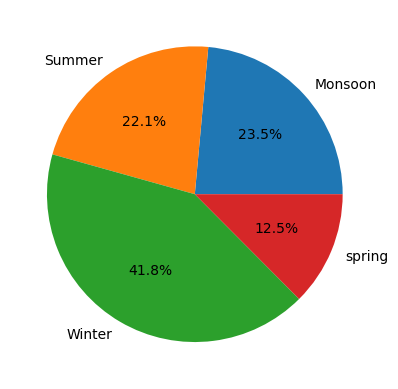

In [108]:
plt.pie(season_count.count_of_invoices,labels=season_count['season'],autopct='%.1f%%')
plt.show()

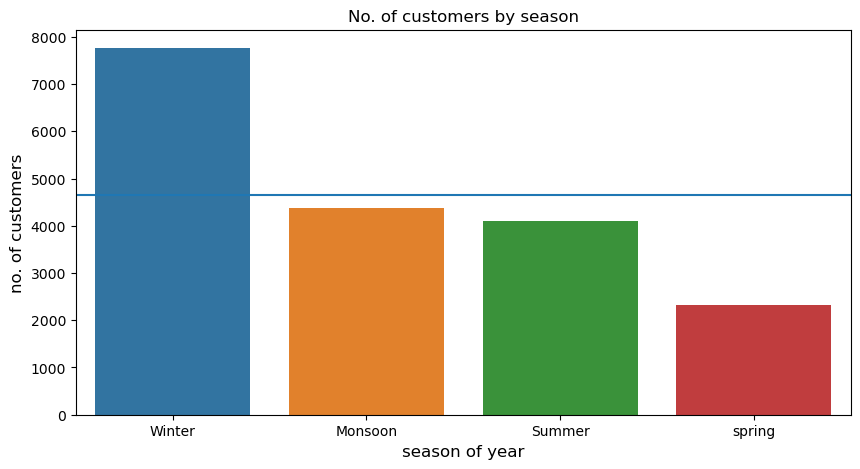

In [109]:
# plot number of customers by season graph
season=df_final100["season"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(season.index,season.values)
#plot the average 
plt.axhline(y=season.mean())
plt.title("No. of customers by season")
plt.ylabel("no. of customers",fontsize=12)
plt.xlabel("season of year",fontsize=12)
plt.show()

# Recommendation Engine

In [110]:
df50=original_data.copy()
df50.head(100)

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
95,536378,22352,lunch box with cutlery retrospot,LUNCH BOX WITH CUTLERY RETROSPOT,6,2010-12-01 09:37:00,2.55,14688.0,United Kingdom
96,536378,21212,pack of 72 retrospot cake cases,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom
97,536378,21975,pack of 60 dinosaur cake cases,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom
98,536378,21977,pack of 60 pink paisley cake cases,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom


In [111]:
# drop the column "lower"

In [112]:
df50=df50.drop(["lower"],axis=1)

In [113]:
df50.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [114]:
df50.dropna(axis=0,inplace=True)

In [115]:
df50.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [116]:
df50.shape

(406829, 8)

In [117]:
# step 1-- create a pivot_table
# step 2-- apply cosine_similarity function on pivot_table

In [118]:
custI_matrix=df50.pivot_table(index="CustomerID",columns="StockCode",values="Quantity",aggfunc="sum",fill_value=0)

In [119]:
custI_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
# we want to see the similarity or filteration of item code as per customer ID 

In [121]:
from sklearn.metrics.pairwise import cosine_similarity

In [122]:
similarity=cosine_similarity(custI_matrix)

In [123]:
similarity

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.14887891, ..., 0.01192112, 0.07451023,
        0.10894226],
       [0.        , 0.14887891, 1.        , ..., 0.        , 0.17517012,
        0.11009593],
       ...,
       [0.        , 0.01192112, 0.        , ..., 1.        , 0.00377618,
        0.        ],
       [0.        , 0.07451023, 0.17517012, ..., 0.00377618, 1.        ,
        0.04444524],
       [0.        , 0.10894226, 0.11009593, ..., 0.        , 0.04444524,
        1.        ]])

In [124]:
similarity.shape

(4372, 4372)

In [125]:
similarity[90]

array([0.        , 0.0299703 , 0.03342911, ..., 0.        , 0.07895145,
       0.        ])

In [126]:
sorted(similarity[90],reverse=True)

[0.9999999999999997,
 0.5692838086641905,
 0.4837798571304113,
 0.4545992099057214,
 0.42293652461147124,
 0.3769227994294265,
 0.37127016455873063,
 0.3328636210502275,
 0.26069874454989433,
 0.2595845219458487,
 0.256633715996664,
 0.24708712314846387,
 0.23419854166404377,
 0.23192017485063052,
 0.22862037232710827,
 0.22838695213929688,
 0.2275677858678694,
 0.22606605083421424,
 0.22181761380513712,
 0.22126817805268817,
 0.21911668444601987,
 0.21702906777900216,
 0.2147732641325767,
 0.21098376350700837,
 0.2102227773792679,
 0.20905490262313375,
 0.20307135051098543,
 0.20142453057890736,
 0.2009578720828636,
 0.19949631890301403,
 0.19680945562099778,
 0.19486850119745966,
 0.19264620958460874,
 0.1916899542184103,
 0.19091906567832984,
 0.19056472581488307,
 0.18924927144252784,
 0.18711775984640852,
 0.18588393233524966,
 0.18562517053192304,
 0.1852378181748003,
 0.1850704730607473,
 0.18494863784857687,
 0.1846580799244623,
 0.1832074951643581,
 0.18301370976137235,
 0.182

In [127]:
final=pd.DataFrame(similarity)

In [128]:
final

,0,1,2,3,4,5,6,7,8,9,...,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.148879,0.020750,0.014435,0.034833,0.0,0.023478,0.506252,0.186107,...,0.0,0.0,0.407060,-0.001245,0.015133,0.037236,0.000000,0.011921,0.074510,0.108942
2,0.0,0.148879,1.000000,0.000169,0.000315,0.001578,0.0,0.010634,0.286226,0.226244,...,0.0,0.0,0.168758,0.000000,0.000000,0.000000,0.000000,0.000000,0.175170,0.110096
3,0.0,0.020750,0.000169,1.000000,0.030121,0.136488,0.0,0.004931,0.000180,0.150819,...,0.0,0.0,0.000000,-0.000344,0.015680,0.000000,0.000000,0.014689,0.065295,0.022576
4,0.0,0.014435,0.000315,0.030121,1.000000,0.001938,0.0,0.000000,0.000000,0.001179,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019385,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,0.0,0.037236,0.000000,0.000000,0.000000,0.000000,0.0,0.002707,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.043042,1.000000,0.098363,0.000000,0.000000,0.000000
4368,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000435,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.098363,1.000000,0.000000,0.098201,0.000000
4369,0.0,0.011921,0.000000,0.014689,0.000000,0.002966,0.0,0.000000,0.007169,0.004772,...,0.0,0.0,0.000000,-0.001372,0.000000,0.000000,0.000000,1.000000,0.003776,0.000000
4370,0.0,0.074510,0.175170,0.065295,0.019385,0.017238,0.0,0.104890,0.050042,0.063930,...,0.0,0.0,0.032142,0.070999,0.000000,0.000000,0.098201,0.003776,1.000000,0.044445


In [129]:
# we need to set the customerid at rows and columns

In [130]:
final.columns=custI_matrix.index

In [131]:
final.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.148879,0.020750,0.014435,0.034833,0.0,0.023478,0.506252,0.186107,...,0.0,0.0,0.407060,-0.001245,0.015133,0.037236,0.0,0.011921,0.074510,0.108942
2,0.0,0.148879,1.000000,0.000169,0.000315,0.001578,0.0,0.010634,0.286226,0.226244,...,0.0,0.0,0.168758,0.000000,0.000000,0.000000,0.0,0.000000,0.175170,0.110096
3,0.0,0.020750,0.000169,1.000000,0.030121,0.136488,0.0,0.004931,0.000180,0.150819,...,0.0,0.0,0.000000,-0.000344,0.015680,0.000000,0.0,0.014689,0.065295,0.022576
4,0.0,0.014435,0.000315,0.030121,1.000000,0.001938,0.0,0.000000,0.000000,0.001179,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.019385,0.000000


In [132]:
final["customerID"]=custI_matrix.index

In [133]:
final=final.set_index("customerID")

In [134]:
final.head(100)

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
customerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.148879,0.020750,0.014435,0.034833,0.000000,0.023478,0.506252,0.186107,...,0.0,0.0,0.407060,-0.001245,0.015133,0.037236,0.000000,0.011921,0.074510,0.108942
12348.0,0.0,0.148879,1.000000,0.000169,0.000315,0.001578,0.000000,0.010634,0.286226,0.226244,...,0.0,0.0,0.168758,0.000000,0.000000,0.000000,0.000000,0.000000,0.175170,0.110096
12349.0,0.0,0.020750,0.000169,1.000000,0.030121,0.136488,0.000000,0.004931,0.000180,0.150819,...,0.0,0.0,0.000000,-0.000344,0.015680,0.000000,0.000000,0.014689,0.065295,0.022576
12350.0,0.0,0.014435,0.000315,0.030121,1.000000,0.001938,0.000000,0.000000,0.000000,0.001179,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019385,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12462.0,0.0,0.012024,0.001435,0.210580,0.001762,0.103558,0.103592,0.002685,0.001016,0.118546,...,0.0,0.0,0.047465,-0.000648,0.000000,0.002597,0.000000,0.000839,0.041771,0.106833
12463.0,0.0,0.195058,0.027851,0.067902,0.025912,0.117215,-0.001604,0.139604,0.172411,0.004446,...,0.0,0.0,0.083761,-0.000572,0.026079,0.000000,0.000000,0.000740,0.076073,0.063624
12464.0,0.0,0.000000,0.005360,0.003535,0.006583,0.042958,0.000000,0.000000,0.000000,0.020063,...,0.0,0.0,0.000000,0.000000,0.000000,0.231169,0.148431,0.000000,0.001029,0.000000


In [135]:
# above matrix is the degree of similarity among the customers. we can use it for Recommendation

In [136]:
# for example reference cust id 12350.0

In [137]:
final.loc[12350.0].sort_values(ascending=False)

CustomerID
12350.0    1.000000
15180.0    0.337317
15422.0    0.336127
13455.0    0.228141
15435.0    0.214309
             ...   
16217.0   -0.000602
18270.0   -0.000618
16252.0   -0.047206
14304.0   -0.053090
17548.0   -0.054147
Name: 12350.0, Length: 4372, dtype: float64

In [138]:
# CUSTOMER A--12350.0
item_cust_A=set(custI_matrix.loc[12350.0].iloc[custI_matrix.loc[12350.0].to_numpy().nonzero()].index)

In [139]:
item_cust_A

{20615,
 20652,
 21171,
 21832,
 21864,
 21866,
 21908,
 21915,
 22348,
 22412,
 22551,
 22557,
 22620,
 '79066K',
 '79191C',
 '84086C',
 'POST'}

In [140]:
# CUSTOMER B--15180.0
item_cust_B=set(custI_matrix.loc[15180.0].iloc[custI_matrix.loc[15180.0].to_numpy().nonzero()].index)

In [141]:
item_cust_B

{22112, 22113, 22114, 22348, 22835, 72741}

In [142]:
Recommended_item_list_cust_A=item_cust_B-item_cust_A

In [143]:
Recommended_item_list_cust_A

{22112, 22113, 22114, 22835, 72741}

In [144]:
df50.loc[df50["StockCode"].isin(item_cust_B),["StockCode","Description"]].drop_duplicates().set_index("StockCode")

,Description
StockCode,
22114,HOT WATER BOTTLE TEA AND SYMPATHY
22835,HOT WATER BOTTLE I AM SO POORLY
22112,CHOCOLATE HOT WATER BOTTLE
22113,GREY HEART HOT WATER BOTTLE
72741,GRAND CHOCOLATECANDLE
22348,TEA BAG PLATE RED RETROSPOT
